In [ ]:
!pip install git+https://github.com/copasi/basico.git
from basico import *

  Cloning https://github.com/copasi/basico.git to /tmp/pip-req-build-qivcmi8h
  Running command git clone -q https://github.com/copasi/basico.git /tmp/pip-req-build-qivcmi8h
     |████████████████████████████████| 9.9MB 6.0MB/s 
  Created wheel for basico: filename=basico-0+untagged.153.gce9585b-cp37-none-any.whl size=109406 sha256=46a510a7c2d63447583218234483e4fa49289847078e86266f489bbdaf3d758e
  Stored in directory: /tmp/pip-ephem-wheel-cache-g3u469o1/wheels/4a/fc/7a/81a1374aa02c9dc16a4a20cf3613dc11982bff9c8ffb6f3b4e
Successfully built basico


In [ ]:
mymodel=load_biomodel(670)

In [ ]:
# the below just shows that the model is not framed in terms of "reactions"
allreactions = get_reactions()
print(allreactions)
allreactionparams = get_reaction_parameters()
print(allreactionparams)

None
None


In [ ]:
# show the species and parameters of the model
allparams = get_parameters()
print(allparams)
allspecies = get_species()
print(allspecies)

          type unit  initial_value  ... value rate           key
name                                ...                         
A        fixed               0.025  ...   NaN  0.0  ModelValue_0
N        fixed               1.000  ...   NaN  0.0  ModelValue_1
I        fixed               0.010  ...   NaN  0.0  ModelValue_2
K_l      fixed              17.857  ...   NaN  0.0  ModelValue_3
delta_l  fixed               0.100  ...   NaN  0.0  ModelValue_4
K_m      fixed              25.000  ...   NaN  0.0  ModelValue_5
xi       fixed               2.000  ...   NaN  0.0  ModelValue_6
S        fixed              62.500  ...   NaN  0.0  ModelValue_7

[8 rows x 8 columns]
                         compartment type  ... particle_number_rate           key
name                                       ...                                   
macrophage    Tumor Microenvironment  ode  ...                  0.0  Metabolite_0
normal cell   Tumor Microenvironment  ode  ...                  0.0  Metabolite_1


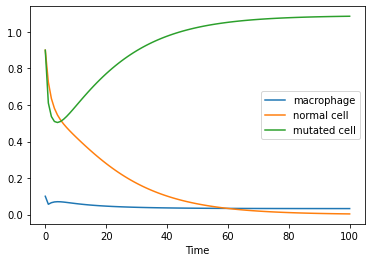

In [ ]:
result = run_time_course(duration=100)
result.plot();

#Question 3. The normal cells die out and the mutated cells take over.

In [ ]:
run_steadystate()
print(get_species()['concentration'])

name
macrophage      3.247332e-02
normal cell     5.075044e-29
mutated cell    1.089821e+00
Name: concentration, dtype: float64


#Question 4: As seen in the concentration column, the mutated cells take over.  Yes, same as from the previous simulation.

In [ ]:
# look at all of the properties of the species
allspecies.info()
# show the values that were specified in the model
print(get_species()['initial_concentration'])
set_species(name='normal cell', initial_concentration = 10)
print(get_species()['initial_concentration'])

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, macrophage to mutated cell
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   compartment              3 non-null      object 
 1   type                     3 non-null      object 
 2   unit                     3 non-null      object 
 3   initial_concentration    3 non-null      float64
 4   initial_particle_number  3 non-null      float64
 5   initial_expression       3 non-null      object 
 6   expression               3 non-null      object 
 7   concentration            0 non-null      float64
 8   particle_number          0 non-null      float64
 9   rate                     3 non-null      float64
 10  particle_number_rate     3 non-null      float64
 11  key                      3 non-null      object 
dtypes: float64(6), object(6)
memory usage: 312.0+ bytes
name
macrophage      0.1
normal cell     0.9
mutated cell    0.9
Name: 

In [ ]:
run_steadystate()
print(get_species()['concentration'])
# set the normal cell concentration back to the original value
set_species(name='normal cell', initial_concentration = 0.9)

name
macrophage      3.247332e-02
normal cell    -9.339031e-30
mutated cell    1.089821e+00
Name: concentration, dtype: float64


#Question 5: The mutated cells still dominate.

In [ ]:
# print details for all of the components of the species
print(allspecies['compartment'])
print(allspecies['type'])
print(allspecies['unit'])
print(allspecies['initial_expression'])
print(allspecies['expression'])
print(allspecies['particle_number_rate'])
print(allspecies['rate'])

name
macrophage      Tumor Microenvironment
normal cell     Tumor Microenvironment
mutated cell    Tumor Microenvironment
Name: compartment, dtype: object
name
macrophage      ode
normal cell     ode
mutated cell    ode
Name: type, dtype: object
name
macrophage      mol/l
normal cell     mol/l
mutated cell    mol/l
Name: unit, dtype: object
name
macrophage      
normal cell     
mutated cell    
Name: initial_expression, dtype: object
name
macrophage      Values[A] * [macrophage] * [mutated cell] * ( ...
normal cell     [normal cell] * ( Values[N] + 1 ) / ( Values[N...
mutated cell    Values[xi] * [mutated cell] * ( Values[N] + 1 ...
Name: expression, dtype: object
name
macrophage      0.0
normal cell     0.0
mutated cell    0.0
Name: particle_number_rate, dtype: float64
name
macrophage      0.0
normal cell     0.0
mutated cell    0.0
Name: rate, dtype: float64


In [ ]:
# show the details for the parameters
allparams.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, A to S
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type                8 non-null      object 
 1   unit                8 non-null      object 
 2   initial_value       8 non-null      float64
 3   initial_expression  8 non-null      object 
 4   expression          8 non-null      object 
 5   value               0 non-null      float64
 6   rate                8 non-null      float64
 7   key                 8 non-null      object 
dtypes: float64(3), object(5)
memory usage: 576.0+ bytes


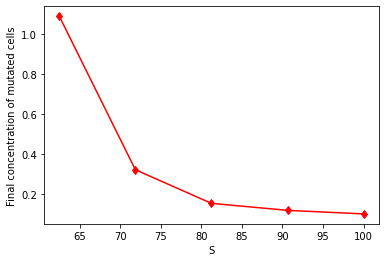

In [ ]:
# now vary the S parameter and see how it affects the concentration of the mutated cells
NumS = 5
Srange = np.linspace(62.5, 100., NumS)
mutvals = np.zeros(NumS)
#mutvals = np.empty(NumS)
for iS in range(0,NumS):
  set_parameters(name = 'S', initial_value = Srange[iS])
  #result = run_time_course(duration=100)
  #result.plot();
  run_steadystate()
  #print(get_species()['concentration'])
  mutconc = get_species(name='mutated cell').concentration.item()
  mutvals[iS] = mutconc
#print(mutvals)
plt.plot(Srange,mutvals,'rd-')
plt.xlabel('S');
plt.ylabel('Final concentration of mutated cells')
plt.show()

#Question 6: As S increases, the balance shifts away from the mutated cells.  This is because parameter S is the rate at which macrophages increase due to interactions with mutated cells.  We can see this from the "reactions" on the webpage for this model.  We can also see this below by printing the expression for the differential of the macrophages, in which we see that S is multiplied by the concentration of mutated cells and there is a positive sign in front of this.  It means that S controls the additional growth of macrophages that occurs as the mutated cells grow.

In [ ]:
print(allspecies['expression']['macrophage'])

Values[A] * [macrophage] * [mutated cell] * ( Values[N] + 1 ) / ( Values[N] + [macrophage] + [mutated cell] + [normal cell] ) + Values[I] * ( 1 + Values[S] * [mutated cell] ) - Values[K_l] * [macrophage] * [mutated cell] * [mutated cell] - Values[delta_l] * [macrophage]
